In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cymbalta = pd.read_csv('clean_cymbalta.csv')

In [3]:
effexor = pd.read_csv('clean_effexor.csv')

In [4]:
pristiq = pd.read_csv('clean_pristiq.csv')

In [5]:
#l3t's put them into on large df called Drugs

drugs = [cymbalta, effexor, pristiq]

cymbalta['drug'] = 'Cymbalta'
effexor['drug'] = "Effexor"
pristiq['drug'] = 'Pristiq'

In [6]:
Drugs = pd.concat([cymbalta, effexor, pristiq])

In [7]:
Drugs.shape

(8303, 13)

In [8]:
set(Drugs['drug'])

{'Cymbalta', 'Effexor', 'Pristiq'}

In [9]:
cymbalta.columns

Index(['Date_time', 'condition', 'age', 'sex', 'Treat_time', 'ease',
       'effective', 'satisfaction', 'comment', 'year', 'month', 'time_mark',
       'drug'],
      dtype='object')

In [10]:
treatorder = [' less than 1 month', ' 1 to 6 months', '6 months to less than 1 year', '1 to less than 2 years', '2 to less than 5 years', '5 to less than 10 years', ' 10 years or more ']


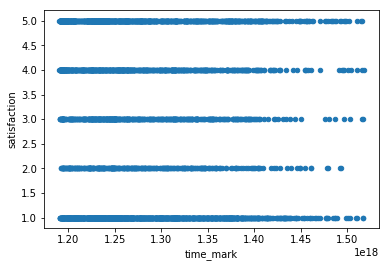

In [11]:
#This is kinda useless
cymbalta.plot(kind = 'scatter', x = 'time_mark', y = 'satisfaction')

In [12]:
#let's do some groupby

Cyeargroup= cymbalta.groupby('year').agg({'satisfaction':'mean', 'ease': 'mean', 'effective':'mean'} )

In [13]:
Cyeargroup

,satisfaction,ease,effective
year,,,
2007,3.582133,4.342939,3.806916
2008,2.888745,3.949547,3.278137
2009,2.936596,4.134594,3.285873
2010,2.931099,4.046555,3.275605
2011,2.646817,3.821355,3.036961
2012,2.819629,3.986737,3.167109
2013,2.656151,3.870662,3.116719
2014,3.134021,4.190722,3.551546
2015,2.626667,3.680000,3.120000


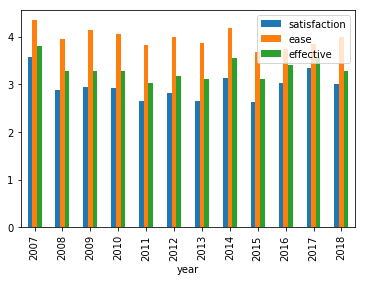

In [14]:
Cyeargroup.plot.bar()

In [15]:
Eyeargroup= effexor.groupby('year').agg({'satisfaction':'mean', 'ease': 'mean', 'effective':'mean'} )

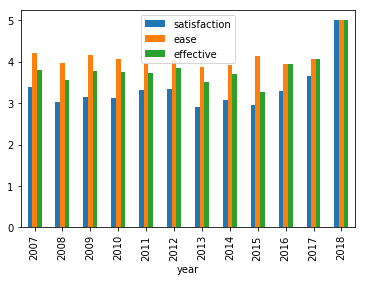

In [16]:
Eyeargroup.plot.bar()

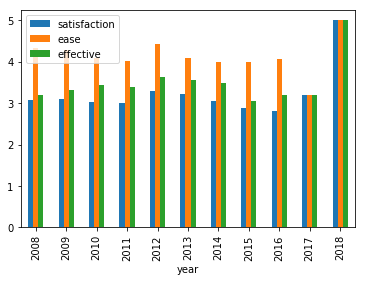

In [17]:
# woah. clearly there aren't many reviews in 2018, we may have to consider weights in calculating these averages 
Pyeargroup= pristiq.groupby('year').agg({'satisfaction':'mean', 'ease': 'mean', 'effective':'mean'} )
Pyeargroup.plot.bar()

In [18]:
# there are some patterns here. Overall ease of use get's high marks, satisfaction is mediocre for all 3 products.
# likely we'll have to ignore 2018, too few points this year
#all drugs

Drugs.describe(include = 'all')


,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug
count,8303,8303,7802,7824,7857,8303.000000,8303.000000,8303.000000,8303,8303.000000,8303.000000,8.303000e+03,8303
unique,8303,16,7,2,7,NaN,NaN,NaN,8286,NaN,NaN,NaN,3
top,2012-12-22 16:51:36,Depression,45-54,Female,1 to 6 months,NaN,NaN,NaN,I have been taking this medication for almost ...,NaN,NaN,NaN,Cymbalta
freq,1,2267,2171,6495,1985,NaN,NaN,NaN,4,NaN,NaN,NaN,4087
mean,NaN,NaN,NaN,NaN,NaN,4.059376,3.448994,3.029989,NaN,2009.876310,6.564133,1.274312e+18,NaN
std,NaN,NaN,NaN,NaN,NaN,1.301359,1.461880,1.609323,NaN,2.155874,3.565568,6.695731e+16,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,2007.000000,1.000000,1.190206e+18,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,2.000000,1.000000,NaN,2008.000000,3.000000,1.224612e+18,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN,2009.000000,7.000000,1.255283e+18,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN,2011.000000,10.000000,1.313449e+18,NaN


In [19]:
cymbalta.describe(include = 'all')

,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug
count,4087,4087,3821,3850,3859,4087.000000,4087.000000,4087.000000,4087,4087.000000,4087.000000,4.087000e+03,4087
unique,4087,8,7,2,7,NaN,NaN,NaN,4080,NaN,NaN,NaN,1
top,2011-07-20 00:02:11,Major Depressive Disorder,45-54,Female,1 to 6 months,NaN,NaN,NaN,good,NaN,NaN,NaN,Cymbalta
freq,1,1703,1110,3167,1068,NaN,NaN,NaN,2,NaN,NaN,NaN,4087
mean,NaN,NaN,NaN,NaN,NaN,4.022021,3.286763,2.922437,NaN,2010.095425,6.608759,1.281354e+18,NaN
std,NaN,NaN,NaN,NaN,NaN,1.337916,1.517713,1.645416,NaN,2.236877,3.539007,6.944880e+16,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,2007.000000,1.000000,1.190253e+18,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,1.000000,NaN,2008.000000,3.000000,1.227440e+18,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN,2010.000000,7.000000,1.263123e+18,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN,2012.000000,10.000000,1.326923e+18,NaN


In [20]:
effexor.describe(include = 'all')

,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug
count,3047,3047,2861,2863,2877,3047.000000,3047.000000,3047.000000,3047,3047.000000,3047.000000,3.047000e+03,3047
unique,3047,13,7,2,7,NaN,NaN,NaN,3041,NaN,NaN,NaN,1
top,2009-02-20 23:11:14,Depression,45-54,Female,2 to less than 5 years,NaN,NaN,NaN,I have been taking this medication for almost ...,NaN,NaN,NaN,Effexor
freq,1,1611,739,2412,724,NaN,NaN,NaN,4,NaN,NaN,NaN,3047
mean,NaN,NaN,NaN,NaN,NaN,4.055793,3.691500,3.149984,NaN,2009.452576,6.450935,1.260625e+18,NaN
std,NaN,NaN,NaN,NaN,NaN,1.272534,1.347161,1.562073,NaN,2.073889,3.654857,6.449903e+16,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,2007.000000,1.000000,1.190206e+18,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,1.000000,NaN,2008.000000,3.000000,1.212502e+18,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN,2009.000000,6.000000,1.240015e+18,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN,2010.000000,10.000000,1.285477e+18,NaN


In [21]:
pristiq.describe(include = 'all')

,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug
count,1169,1169,1120,1111,1121,1169.000000,1169.000000,1169.000000,1169,1169.000000,1169.000000,1.169000e+03,1169
unique,1169,10,7,2,7,NaN,NaN,NaN,1167,NaN,NaN,NaN,1
top,2013-04-03 05:53:41,Depression,45-54,Female,1 to 6 months,NaN,NaN,NaN,"I was on Pristiq 50 for 3months, ended up with...",NaN,NaN,NaN,Pristiq
freq,1,656,322,916,426,NaN,NaN,NaN,2,NaN,NaN,NaN,1169
mean,NaN,NaN,NaN,NaN,NaN,4.199316,3.384089,3.093242,NaN,2010.214713,6.703165,1.285367e+18,NaN
std,NaN,NaN,NaN,NaN,NaN,1.236073,1.466096,1.578656,NaN,1.887936,3.413811,5.796733e+16,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,2008.000000,1.000000,1.213273e+18,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,2.000000,1.000000,NaN,2009.000000,4.000000,1.243371e+18,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,3.000000,NaN,2010.000000,7.000000,1.266356e+18,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,5.000000,5.000000,NaN,2011.000000,10.000000,1.314753e+18,NaN


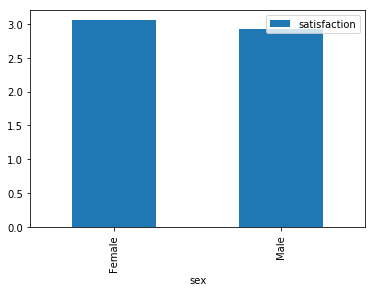

In [22]:
Dgroup1 = Drugs.groupby('sex').agg({'satisfaction':'mean'})
Dgroup1.plot.bar()

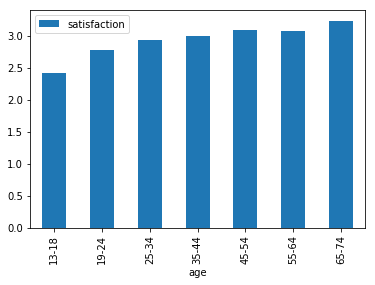

In [23]:
Dgroupage = Drugs.groupby('age').agg({'satisfaction':'mean'})
Dgroupage.plot.bar()

satisfaction                    
drug                             Cymbalta   Effexor   Pristiq
Treat_time                                                   
 less than 1 month               2.153951  2.174905  2.739612
 1 to 6 months                   2.784644  2.806517  3.133803
6 months to less than 1 year     2.984436  2.968454  3.205882
1 to less than 2 years           3.141509  3.135897  3.549550
2 to less than 5 years           3.494286  3.412983  3.560606
5 to less than 10 years          3.616279  3.470707  3.666667
 10 years or more                3.485714  3.903553  3.833333

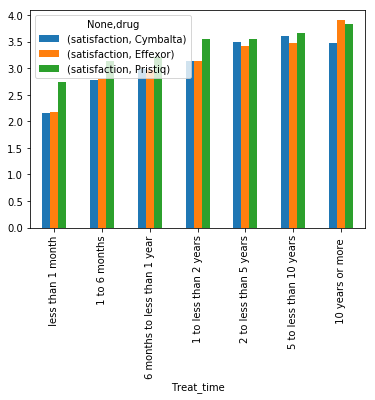

In [24]:
Dgrouptreat = Drugs.groupby(['Treat_time', 'drug']).agg({'satisfaction': 'mean'})

Dgrouptreat = Dgrouptreat.unstack(level = 1)
Dgrouptreat = Dgrouptreat.reindex(treatorder)

Dgrouptreat.plot.bar()
Dgrouptreat

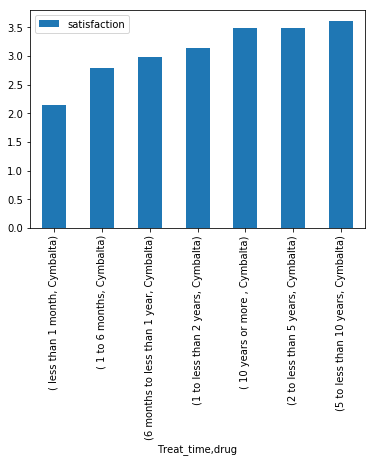

In [25]:
Cgrouptreat = cymbalta.groupby(['Treat_time', 'drug']).agg({'satisfaction': 'mean'}).sort_values('satisfaction')
Cgrouptreat.plot.bar()

,,satisfaction
Treat_time,drug,
less than 1 month,Effexor,2.174905
1 to 6 months,Effexor,2.806517
6 months to less than 1 year,Effexor,2.968454
1 to less than 2 years,Effexor,3.135897
2 to less than 5 years,Effexor,3.412983
5 to less than 10 years,Effexor,3.470707
10 years or more,Effexor,3.903553


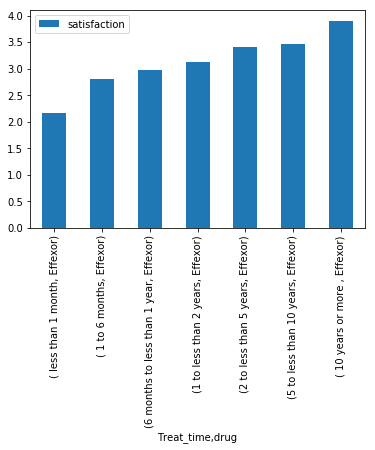

In [26]:
Egrouptreat = effexor.groupby(['Treat_time', 'drug']).agg({'satisfaction': 'mean'}).sort_values('satisfaction')
Egrouptreat.plot.bar()
Egrouptreat

In [27]:
Drugs.Treat_time = Drugs.Treat_time.astype('category')
print(set(Drugs.Treat_time))

{nan, ' 1 to 6 months', '5 to less than 10 years', ' 10 years or more ', '1 to less than 2 years', '2 to less than 5 years', ' less than 1 month', '6 months to less than 1 year'}


In [28]:
Drugs.Treat_time = Drugs.Treat_time.cat.reorder_categories([' less than 1 month', ' 1 to 6 months', '6 months to less than 1 year', '1 to less than 2 years', '2 to less than 5 years', '5 to less than 10 years', ' 10 years or more '])



In [29]:
DGroup2 = Drugs.groupby(['Treat_time', 'drug']).agg({'satisfaction': 'mean'}).reset_index()

In [30]:
DGroup2.index.names

FrozenList([None])

In [32]:
#Dgroup2.shape


In [33]:
treatlevel = [' less than 1 month', ' 1 to 6 months', '6 months to less than 1 year', '1 to less than 2 years', '2 to less than 5 years', '5 to less than 10 years', ' 10 years or more ']

In [34]:
Dgroup2a.index

NameError: name 'Dgroup2a' is not defined

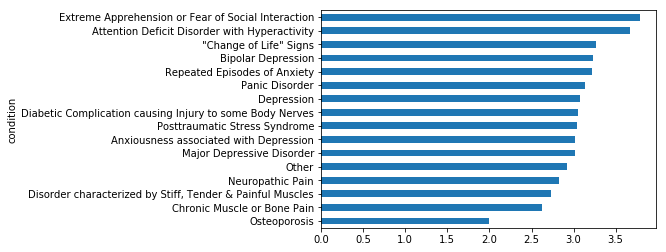

In [35]:
Dgroup3 = Drugs.groupby('condition')['satisfaction'].mean().sort_values()
Dgroup3.plot.barh()

condition
Osteoporosis                                                    1
Attention Deficit Disorder with Hyperactivity                   8
Diabetic Complication causing Injury to some Body Nerves       29
Anxiousness associated with Depression                         53
Extreme Apprehension or Fear of Social Interaction             65
Posttraumatic Stress Syndrome                                  80
Panic Disorder                                                224
"Change of Life" Signs                                        249
Bipolar Depression                                            253
Chronic Muscle or Bone Pain                                   320
Disorder characterized by Stiff, Tender & Painful Muscles     350
Neuropathic Pain                                              612
Other                                                         657
Repeated Episodes of Anxiety                                  946
Major Depressive Disorder                                    1809


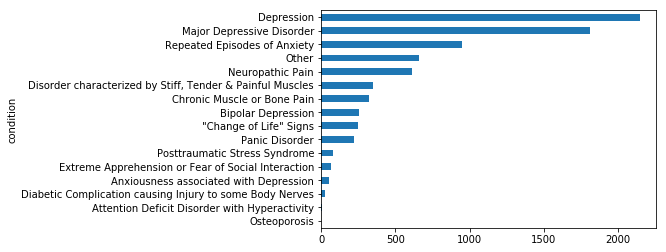

In [36]:
Dgroup4 = Drugs.groupby('condition')['age'].count().sort_values()
Dgroup4.plot.barh()
print(Dgroup4)

In [37]:
set(Drugs.condition)

{'"Change of Life" Signs',
 'Anxiousness associated with Depression',
 'Attention Deficit Disorder with Hyperactivity',
 'Bipolar Depression',
 'Chronic Muscle or Bone Pain',
 'Depression',
 'Diabetic Complication causing Injury to some Body Nerves',
 'Disorder characterized by Stiff, Tender & Painful Muscles',
 'Extreme Apprehension or Fear of Social Interaction',
 'Major Depressive Disorder',
 'Neuropathic Pain',
 'Osteoporosis',
 'Other',
 'Panic Disorder',
 'Posttraumatic Stress Syndrome',
 'Repeated Episodes of Anxiety'}

In [38]:
# let's try to group these in to 'behavior', 'pain', 'other'

pattern = (r"\bDepressive\b|\bAnxiety\b|\bDepression\b|\bAttention\b|\bApprehension\b|\bPanic\b|\bStress\b|\bChange\b")

print(sum(Drugs.condition.str.contains(pattern)))
print(len(Drugs) - sum(Drugs.condition.str.contains(pattern)))
print(len(Drugs))

6176
2127
8303


In [39]:
print(sum(Drugs.condition.str.contains("Other")))

709


In [40]:
Drugs['cat'] = np.nan

In [41]:
Drugs['cat'][Drugs.condition.str.contains(pattern)] = 'Behavior'
Drugs['cat'][Drugs.condition.str.contains('Other')] = 'Other'


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
Drugs

,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug,cat
0,2007-09-20 01:48:50,Major Depressive Disorder,45-54,Female,2 to less than 5 years,5,5,5,I have been taking Cymbalta for depression and...,2007,9,1.190253e+18,Cymbalta,Behavior
1,2007-09-20 14:15:07,Repeated Episodes of Anxiety,45-54,Female,5 to less than 10 years,5,5,4,It has worked better for me than any other med...,2007,9,1.190298e+18,Cymbalta,Behavior
2,2007-09-21 18:05:58,Neuropathic Pain,45-54,Female,1 to 6 months,1,1,1,I have MS and mhave been treated for depressio...,2007,9,1.190398e+18,Cymbalta,NaN
3,2007-09-22 06:13:37,Major Depressive Disorder,19-24,Female,1 to 6 months,5,3,3,I was on this medication to help alleviate my ...,2007,9,1.190442e+18,Cymbalta,Behavior
4,2007-09-22 11:55:28,Neuropathic Pain,65-74,Female,1 to 6 months,5,5,5,I have suffered with Fibromyalgia for years. ...,2007,9,1.190462e+18,Cymbalta,NaN
5,2007-09-22 18:39:36,Repeated Episodes of Anxiety,35-44,Female,6 months to less than 1 year,5,4,4,"This drug works very good for me, however, if ...",2007,9,1.190486e+18,Cymbalta,Behavior
6,2007-09-23 23:29:22,Repeated Episodes of Anxiety,19-24,Female,1 to 6 months,5,5,5,I recommend this drug for anyone else who has ...,2007,9,1.190590e+18,Cymbalta,Behavior
7,2007-09-24 14:43:20,Major Depressive Disorder,NaN,NaN,NaN,5,4,4,cymbalta has been easy to adjust with minimal ...,2007,9,1.190645e+18,Cymbalta,Behavior
8,2007-09-24 18:40:14,Other,25-34,Female,1 to 6 months,5,4,4,"I have chronic pain, and some anxiety/depressi...",2007,9,1.190659e+18,Cymbalta,Other
9,2007-09-24 19:31:16,Major Depressive Disorder,55-64,Female,1 to 6 months,1,2,1,I tried this med but found expensive and did n...,2007,9,1.190662e+18,Cymbalta,Behavior


In [43]:
sum(Drugs.cat.isnull())

1418

In [44]:
Drugs.cat = Drugs.cat.fillna('Pain')

In [45]:
Drugs

,Date_time,condition,age,sex,Treat_time,ease,effective,satisfaction,comment,year,month,time_mark,drug,cat
0,2007-09-20 01:48:50,Major Depressive Disorder,45-54,Female,2 to less than 5 years,5,5,5,I have been taking Cymbalta for depression and...,2007,9,1.190253e+18,Cymbalta,Behavior
1,2007-09-20 14:15:07,Repeated Episodes of Anxiety,45-54,Female,5 to less than 10 years,5,5,4,It has worked better for me than any other med...,2007,9,1.190298e+18,Cymbalta,Behavior
2,2007-09-21 18:05:58,Neuropathic Pain,45-54,Female,1 to 6 months,1,1,1,I have MS and mhave been treated for depressio...,2007,9,1.190398e+18,Cymbalta,Pain
3,2007-09-22 06:13:37,Major Depressive Disorder,19-24,Female,1 to 6 months,5,3,3,I was on this medication to help alleviate my ...,2007,9,1.190442e+18,Cymbalta,Behavior
4,2007-09-22 11:55:28,Neuropathic Pain,65-74,Female,1 to 6 months,5,5,5,I have suffered with Fibromyalgia for years. ...,2007,9,1.190462e+18,Cymbalta,Pain
5,2007-09-22 18:39:36,Repeated Episodes of Anxiety,35-44,Female,6 months to less than 1 year,5,4,4,"This drug works very good for me, however, if ...",2007,9,1.190486e+18,Cymbalta,Behavior
6,2007-09-23 23:29:22,Repeated Episodes of Anxiety,19-24,Female,1 to 6 months,5,5,5,I recommend this drug for anyone else who has ...,2007,9,1.190590e+18,Cymbalta,Behavior
7,2007-09-24 14:43:20,Major Depressive Disorder,NaN,NaN,NaN,5,4,4,cymbalta has been easy to adjust with minimal ...,2007,9,1.190645e+18,Cymbalta,Behavior
8,2007-09-24 18:40:14,Other,25-34,Female,1 to 6 months,5,4,4,"I have chronic pain, and some anxiety/depressi...",2007,9,1.190659e+18,Cymbalta,Other
9,2007-09-24 19:31:16,Major Depressive Disorder,55-64,Female,1 to 6 months,1,2,1,I tried this med but found expensive and did n...,2007,9,1.190662e+18,Cymbalta,Behavior


In [46]:
set(Drugs.cat)
yerrs = [np.sem(Drugs[Drugs.cat == x]['effective']) for x in ['Behavior', 'Other', 'Pain']]
yerrs

AttributeError: module 'numpy' has no attribute 'sem'

In [47]:
Dgroup5 = Drugs.groupby('cat').agg({'effective':'mean'})
Dgroup5.plot.bar(yerr = yerrs)
Dgroup5

NameError: name 'yerrs' is not defined

In [48]:
stats.ttest_ind(Drugs.loc[Drugs.cat == 'Behavior']['satisfaction'], Drugs.loc[Drugs.cat == 'Pain']['satisfaction'])

NameError: name 'stats' is not defined

cat
Behavior    3.104437
Other       2.925247
Pain        2.758110
Name: satisfaction, dtype: float64


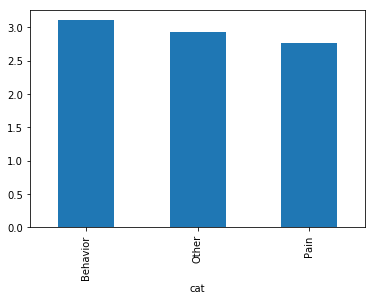

In [49]:
Dgroup6 = Drugs.groupby('cat')['satisfaction'].mean()
Dgroup6.plot.bar()
print(Dgroup6)

In [50]:
Dgroup7 = Drugs.groupby('drug').agg({'satisfaction':'mean', 'ease':'mean', 'effective':'mean'})

In [51]:
Dgroup7

,satisfaction,ease,effective
drug,,,
Cymbalta,2.922437,4.022021,3.286763
Effexor,3.149984,4.055793,3.691500
Pristiq,3.093242,4.199316,3.384089


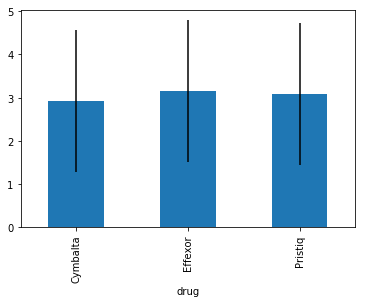

In [52]:
Dgroup7['satisfaction'].plot.bar(yerr = np.std(cymbalta.satisfaction))

In [53]:
from scipy import stats

In [54]:
#taking some T tests
stats.ttest_ind(cymbalta.satisfaction, pristiq.satisfaction)

Ttest_indResult(statistic=-3.1577594428900579, pvalue=0.0015988714318158413)

In [55]:
stats.ttest_ind(cymbalta.satisfaction, effexor.satisfaction)

Ttest_indResult(statistic=-5.9036738959127133, pvalue=3.7180216683152702e-09)

In [56]:
np.std(cymbalta.satisfaction)

1.6452147935865642

In [57]:
stats.f_oneway(cymbalta.satisfaction, effexor.satisfaction, pristiq.satisfaction)

F_onewayResult(statistic=18.578136895677062, pvalue=8.9047892321658098e-09)

In [58]:
(cymbalta.satisfaction.mean()- effexor.satisfaction.mean())*20

-4.550931901313797

In [59]:
stats.pearsonr(Drugs.satisfaction, Drugs.effective) #demonstarting that satisfaction is closely linked to reviers opinion of 'effectiveness'

(0.81535564923333126, 0.0)

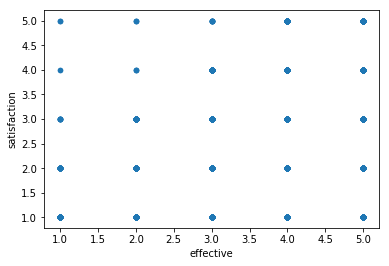

In [60]:
Drugs.plot.scatter(x = 'effective', y = 'satisfaction') # lol that's not useful

In [61]:
Dyear = Drugs.groupby('year')['satisfaction'].mean()
Dyear.shape


(12,)

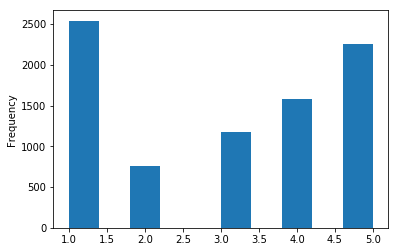

In [62]:
Drugs.satisfaction.plot.hist() # this should have been your first plot 

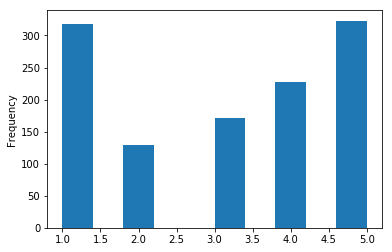

In [63]:
pristiq.satisfaction.plot.hist()

In [64]:
# binary is obvious. let's separate the groups with another category 'satcat'
# Assumption: 2 and below is v.neg, 3 and up is ok to good
# these are two populations 
Drugs['Sat'] = np.nan


In [26]:
Drugs.loc[Drugs.satisfaction <= 2, 'Sat'] = 'poor (1-2)' 
Drugs.loc[Drugs.satisfaction == 3, 'Sat'] = 'ok (3)'
Drugs.loc[Drugs.satisfaction > 3, 'Sat'] = 'good (4-5)'

In [27]:
Drugs.Sat.describe()

count           8303
unique             3
top       good (4-5)
freq            3833
Name: Sat, dtype: object

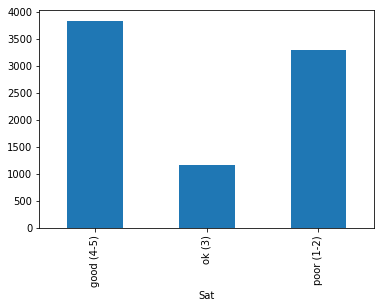

In [28]:
DgroupB = Drugs.groupby(['Sat'])['satisfaction'].count()
DgroupB.plot.bar()


In [68]:
Drugs.to_csv('Drugs.csv', sep = ',', encoding = 'utf-8')

In [69]:
# we run chisq test across satisfaction, effectiveness, ease of use 
meds = [cymbalta, effexor, pristiq]

for med in meds:
    sat = []
    eff = []
    ease = []
    sat.append([med.satisfaction.astype])


In [70]:
sat = [cymbalta.satisfaction, effexor.satisfaction, pristiq.satisfaction]

In [71]:
eff = [cymbalta.effective, effexor.effective, pristiq.effective]

In [72]:
ease = [cymbalta.ease, effexor.ease, pristiq.ease]

In [73]:
stats.chisquare(Drugs.drug, Drugs.satisfaction)

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [74]:
def rates(med):
    ratings = []
    for rating in range(1,6):
        ratings.append(len(Drugs.loc[(Drugs.drug == med) & (Drugs.satisfaction == rating)]))
    return(ratings)

In [75]:
def rates2(med):
    ratings = []
    for rating in ['good', 'poor']:
        ratings.append(len(Drugs.loc[(Drugs.drug == med) & (Drugs.Sat == rating)]))
    return(ratings)

In [76]:
cymbalta_sat = rates('Cymbalta')
effexor_sat = rates("Effexor")
pristiq_sat = rates('Pristiq')

In [77]:
print(pristiq_sat)
print(effexor_sat)
print(cymbalta_sat)

[318, 129, 171, 228, 323]
[801, 279, 469, 658, 840]
[1421, 349, 533, 694, 1090]


In [78]:
stats.chisquare(pristiq_sat, effexor_sat)

Power_divergenceResult(statistic=1160.4441302658404, pvalue=5.985506785419385e-250)

In [79]:
cymbalta_sat2 = rates2('Cymbalta')
effexor_sat2 = rates2("Effexor")
pristiq_sat2 = rates2('Pristiq')

In [80]:
print(pristiq_sat2)
print(effexor_sat2)
print(cymbalta_sat2)

[551, 447]
[1498, 1080]
[1784, 1770]


In [81]:
stats.chisquare(cymbalta_sat2, effexor_sat2)

Power_divergenceResult(statistic=495.43680462839342, pvalue=9.3505795296452819e-110)

In [82]:
rate_arry = np.array([pristiq_sat2, effexor_sat2, cymbalta_sat2])

In [83]:
good = [rate_arry[x][0] for x in [0,1,2]]
bad = [rate_arry[x][1] for x in [0,1,2]]

In [84]:
gvb = np.array([good,bad])

In [85]:
gvb

array([[ 551, 1498, 1784],
       [ 447, 1080, 1770]])

In [86]:
stats.chi2_contingency(gvb)

(38.591970615710736,
 4.1673507788670685e-09,
 2,
 array([[  536.51248247,  1385.90098177,  1910.58653576],
        [  461.48751753,  1192.09901823,  1643.41346424]]))

In [87]:
gvbdf = pd.DataFrame(gvb, columns = ['Pristiq', 'Effexor', 'Cymbalta'], index = ['Good', 'Poor'])
gvbdf


,Pristiq,Effexor,Cymbalta
Good,551,1498,1784
Poor,447,1080,1770


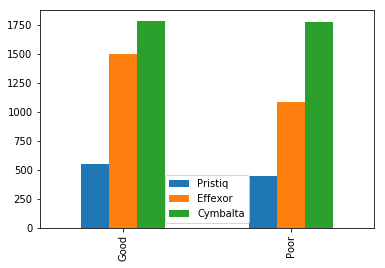

In [88]:
gvbdf.plot.bar()

In [89]:
ratio = np.array([gvbdf.loc['Good', drug]/gvbdf.loc['Poor', drug] for drug in gvbdf.columns]).reshape(3,1)

In [90]:
ratiodf = pd.DataFrame(ratio, index = gvbdf.columns)

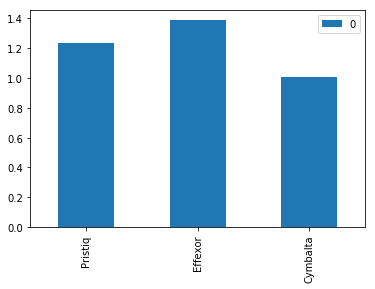

In [91]:
ratiodf.plot.bar()

In [92]:
SexGroup = Drugs.groupby(['drug', 'sex'])['sex'].count()
SexGroupdf = SexGroup.unstack(level = 0)
SexGroupArr = SexGroupdf.values
SexGroupdf

drug,Cymbalta,Effexor,Pristiq
sex,,,
Female,3167,2412,916
Male,683,451,195


In [93]:
stats.chi2_contingency(SexGroupArr) # MF ratio same across 3 drugs 

(4.8937052953880418,
 0.086565610671230808,
 2,
 array([[ 3196.03144172,  2376.68519939,   922.2833589 ],
        [  653.96855828,   486.31480061,   188.7166411 ]]))

In [94]:
MFratio = np.array([SexGroupdf.loc['Male', drug]/SexGroupdf.loc['Female', drug] for drug in SexGroupdf.columns]).reshape(3,1)

In [95]:
MFratiodf = pd.DataFrame(MFratio, index = SexGroupdf.columns, columns = ['M/F ratio'])

In [96]:
MFratiodf

,M/F ratio
drug,
Cymbalta,0.215662
Effexor,0.186982
Pristiq,0.212882


In [97]:
CondGroup = Drugs.groupby(['drug', 'cat'])['cat'].count()
CondGroupdf = CondGroup.unstack(level=0)
CondGroupdf2 = CondGroupdf.iloc[[0,2]]
CondGroupArr = CondGroupdf2.values

In [98]:
CondGroupdf2

drug,Cymbalta,Effexor,Pristiq
cat,,,
Behavior,2249,2825,1102
Pain,1360,40,18


In [99]:
CondTab = pd.crosstab(Drugs.drug, Drugs.cat,normalize = 'index')[['Behavior','Pain']]
CondTab

cat,Behavior,Pain
drug,,
Cymbalta,0.550281,0.332762
Effexor,0.927141,0.013128
Pristiq,0.942686,0.015398


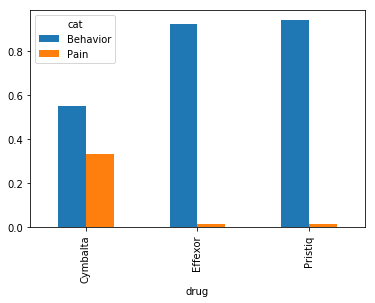

In [100]:
CondTab.plot.bar()

In [101]:
CondGroupArr = CondGroupArr.reshape((2,3), order = 'F')
CondGroupArr

array([[2249, 2825, 1102],
       [1360,   40,   18]], dtype=int64)

In [102]:
stats.chi2_contingency(CondGroupArr) # there is very little doubt that condition is a factor with a pvalue at 0

(1636.8162264295127,
 0.0,
 2,
 array([[ 2935.10455623,  2330.02897024,   910.86647353],
        [  673.89544377,   534.97102976,   209.13352647]]))

In [103]:
AgeGroup = Drugs.groupby(['drug', 'age'])['age'].count()
AgeGroupdf = AgeGroup.unstack(level = 0)

In [104]:
AgeGroupdf2 = AgeGroupdf.iloc[range(1,len(AgeGroupdf))]

In [105]:
AgeGroupdf2

drug,Cymbalta,Effexor,Pristiq
age,,,
19-24,202,233,65
25-34,534,612,225
35-44,770,603,269
45-54,1110,739,322
55-64,856,491,200
65-74,322,157,33


In [106]:
Agect = pd.crosstab(Drugs.age, Drugs.drug, margins = True, normalize = 'columns') # easy way to also get contingency table

In [107]:
Agect2 = Agect.iloc[range(1,len(Agect))]

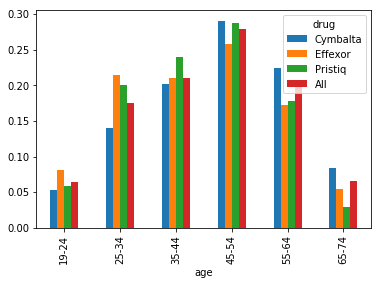

In [108]:
Agect2.plot.bar()

In [109]:
stats.chi2_contingency(Agect2) # turns out you don't need to pass through an array. pd.crosstab 
# chisq 

(0.066347230221234343,
 0.99999999999999944,
 15,
 array([[ 0.06411996,  0.06398942,  0.06423033,  0.06408794],
        [ 0.18260773,  0.18223596,  0.18292204,  0.18251652],
        [ 0.21577412,  0.21533483,  0.21614552,  0.21566635],
        [ 0.27869751,  0.27813011,  0.27917722,  0.27855831],
        [ 0.19316366,  0.19277039,  0.19349614,  0.19306717],
        [ 0.05857081,  0.05845156,  0.05867162,  0.05854155]]))

In [110]:
Drugs.columns

Index(['Date_time', 'condition', 'age', 'sex', 'Treat_time', 'ease',
       'effective', 'satisfaction', 'comment', 'year', 'month', 'time_mark',
       'drug', 'cat', 'Sat'],
      dtype='object')

In [111]:
TTtab = pd.crosstab(Drugs.Treat_time, Drugs.drug)
TTtab

drug,Cymbalta,Effexor,Pristiq
Treat_time,,,
less than 1 month,734,263,361
1 to 6 months,1068,491,426
6 months to less than 1 year,514,317,136
1 to less than 2 years,636,390,111
2 to less than 5 years,700,724,66
5 to less than 10 years,172,495,15
10 years or more,35,197,6


In [112]:
stats.chi2_contingency(TTtab)

(1224.0525168589893,
 1.144455524646436e-254,
 12,
 array([[ 666.98765432,  497.25925926,  193.75308642],
        [ 974.94145348,  726.8480336 ,  283.21051292],
        [ 474.94628993,  354.0866743 ,  137.96703576],
        [ 558.44253532,  416.33562428,  162.2218404 ],
        [ 731.82003309,  545.59373807,  212.58622884],
        [ 334.96729031,  249.72814051,   97.30456917],
        [ 116.89474354,   87.14852997,   33.95672649]]))

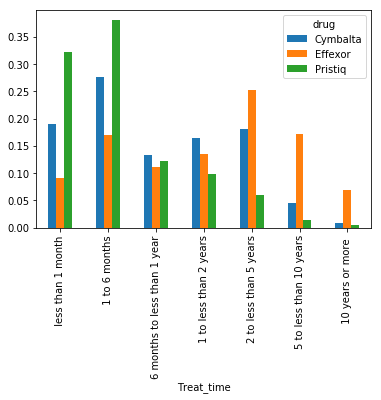

In [113]:
TTtab2 = pd.crosstab(Drugs.Treat_time, Drugs.drug, normalize = 'columns')

TTtab2.plot.bar()

In [114]:
TTtab2

TTtab3 = TTtab2.reindex([' less than 1 month', ' 1 to 6 months', '6 months to less than 1 year', '1 to less than 2 years', '2 to less than 5 years', '5 to less than 10 years', ' 10 years or more '])
TTtab3 = TTtab3[['Effexor', 'Pristiq']]

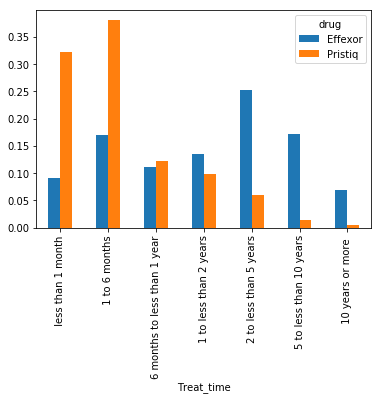

In [115]:
TTtab3.plot.bar()


In [116]:
SatTab = pd.crosstab(Drugs.Treat_time, Drugs.satisfaction, normalize = 'columns')

In [117]:
SatTab

satisfaction,1,2,3,4,5
Treat_time,,,,,
less than 1 month,0.295880,0.142657,0.154611,0.104000,0.102203
1 to 6 months,0.291303,0.288112,0.215190,0.229333,0.233005
6 months to less than 1 year,0.116521,0.149650,0.128391,0.132667,0.112049
1 to less than 2 years,0.119018,0.142657,0.163653,0.172000,0.145335
2 to less than 5 years,0.115689,0.169231,0.222423,0.220667,0.240975
5 to less than 10 years,0.049105,0.088112,0.092224,0.100000,0.116737
10 years or more,0.012484,0.019580,0.023508,0.041333,0.049695


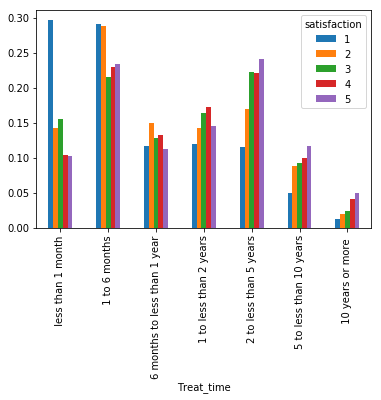

In [118]:
SatTab.plot.bar()

In [123]:
len(Drugs.loc[Drugs.drug == 'Pristiq'])

1169